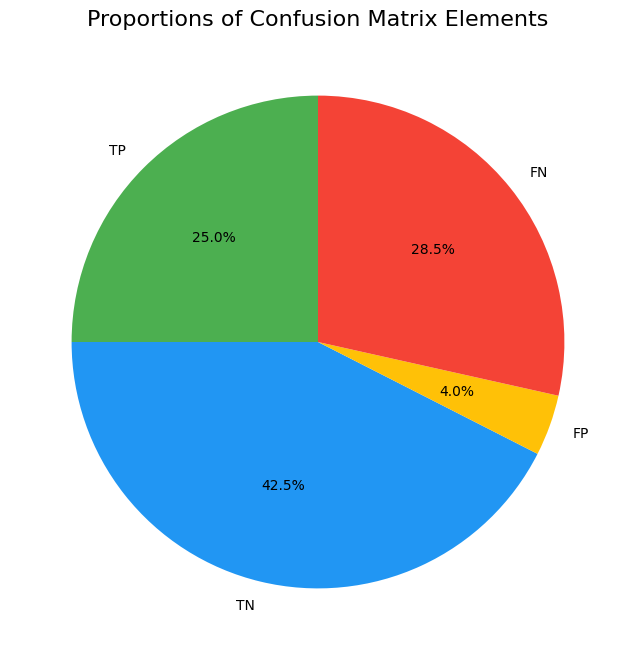

In [2]:
import matplotlib.pyplot as plt
labels = ['TP', 'TN', 'FP', 'FN']
values = [50, 85, 8, 57]
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#2196F3', '#FFC107', '#F44336'])
plt.title('Proportions of Confusion Matrix Elements', fontsize=16)
plt.show()


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

data_path = "токсик коментс.csv"
data = pd.read_csv(data_path)
texts = data['Text']
labels = data['IsToxic']
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
rf_model = RandomForestClassifier(random_state=42)

lr_model = LogisticRegression(max_iter=1000, random_state=42)
voting_model = VotingClassifier(
    estimators=[('rf', rf_model), ('lr', lr_model)], voting='soft'
)
voting_model.fit(X_train_tfidf, y_train)
voting_predictions = voting_model.predict(X_test_tfidf)
print("Voting Classifier Classification Report:")
toxic_comments = X_test[voting_predictions == 1]
print("Toxic comments detected by Voting Classifier:")
print(toxic_comments)


Voting Classifier Classification Report:
Toxic comments detected by Voting Classifier:
678    The crazy thing is I thought offices never do ...
549                               Joe rogan is an idiot.
986                          9:41 Dems a big ass gun! 😂😭
947    I see all these signs, "black lives matter!", ...
346    Yea fuck that store clerk to! how dare he try ...
139    I find it amusing how all of these protesters ...
687    You should be legally allowed to run them down...
584    They should all be shot. I would have ran all ...
59     Racial profiling and police intimidation? He r...
96                How was this guy hired?\nWhat an idiot
974    If you think I am nit upset about the white pe...
277    .     Leaving out information when giving a po...
601    The drivers should have just ran them over and...
439    all police officers should be wearing a camera...
570    Fucking dumbass attention whores causing more ...
578                                        Run them over
2

Voting Classifier Classification Report:
              precision    recall  f1-score   support

       False       0.66      0.89      0.76        93
        True       0.86      0.60      0.71       107

    accuracy                           0.73       200
   macro avg       0.76      0.75      0.73       200
weighted avg       0.77      0.73      0.73       200

Voting Classifier Accuracy: 0.73
Voting Classifier AUC-ROC: 0.89


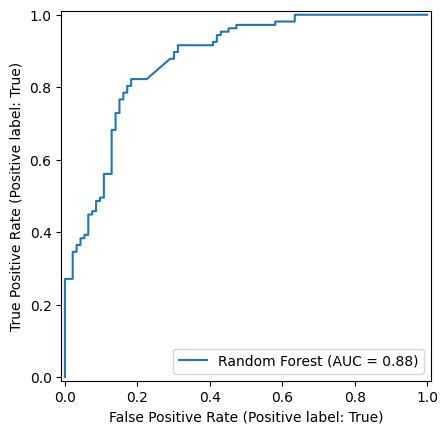

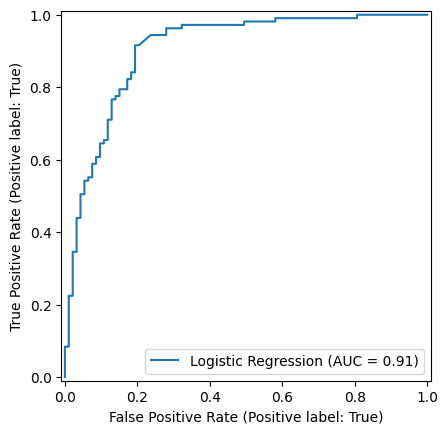

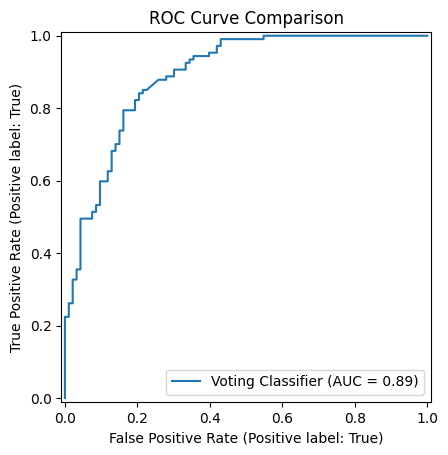

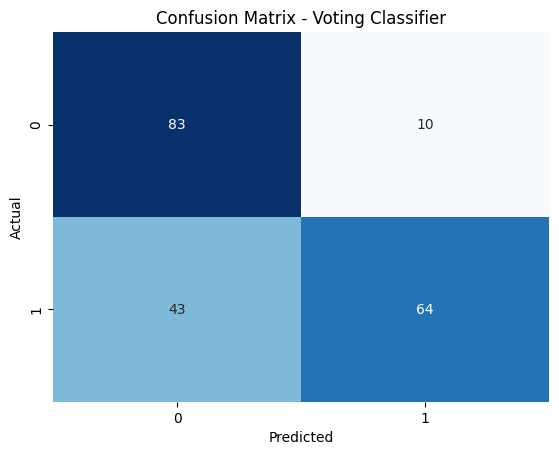

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import (
    classification_report, roc_auc_score, accuracy_score, confusion_matrix, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('токсик коментс.csv')
texts = data['Text']
labels = data['IsToxic']
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000, stop_words='english')
X = vectorizer.fit_transform(texts)
selector = SelectKBest(chi2, k=3000)
X = selector.fit_transform(X, labels)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=200)
lr_model = LogisticRegression(random_state=42, max_iter=1000, C=0.5, penalty='l2', class_weight='balanced')
et_model = ExtraTreesClassifier(random_state=42, n_estimators=200)

rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)

voting_model = VotingClassifier(
    estimators=[
        ('Random Forest', rf_model),
        ('Logistic Regression', lr_model),
        ('Extra Trees', et_model)
    ],
    voting='soft'
)
voting_model.fit(X_train, y_train)

voting_preds = voting_model.predict(X_test)
voting_probs = voting_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, voting_preds)
auc_roc = roc_auc_score(y_test, voting_probs)
report = classification_report(y_test, voting_preds)
conf_matrix = confusion_matrix(y_test, voting_preds)

print("Voting Classifier Classification Report:")
print(report)
print(f"Voting Classifier Accuracy: {accuracy:.2f}")
print(f"Voting Classifier AUC-ROC: {auc_roc:.2f}")

RocCurveDisplay.from_estimator(rf_model, X_test, y_test, name="Random Forest")
RocCurveDisplay.from_estimator(lr_model, X_test, y_test, name="Logistic Regression")
RocCurveDisplay.from_estimator(voting_model, X_test, y_test, name="Voting Classifier")
plt.title("ROC Curve Comparison")
plt.show()

# Матрица ошибок
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Voting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.65      0.83      0.73        93
        True       0.80      0.62      0.70       107

    accuracy                           0.71       200
   macro avg       0.73      0.72      0.71       200
weighted avg       0.73      0.71      0.71       200

Random Forest AUC-ROC: 0.81

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.60      0.84      0.70        93
        True       0.79      0.51      0.62       107

    accuracy                           0.67       200
   macro avg       0.69      0.68      0.66       200
weighted avg       0.70      0.67      0.66       200

Logistic Regression AUC-ROC: 0.79

Voting Classifier Classification Report:
              precision    recall  f1-score   support

       False       0.65      0.83      0.73        93
        True       0.80      0.61      0.69       10

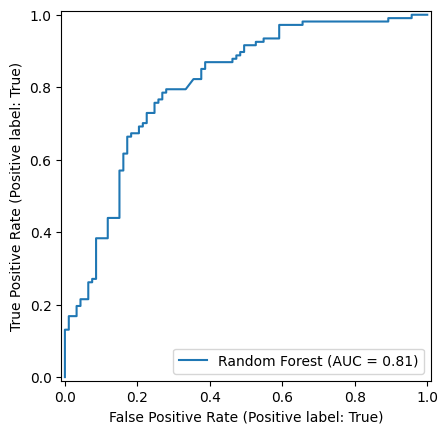

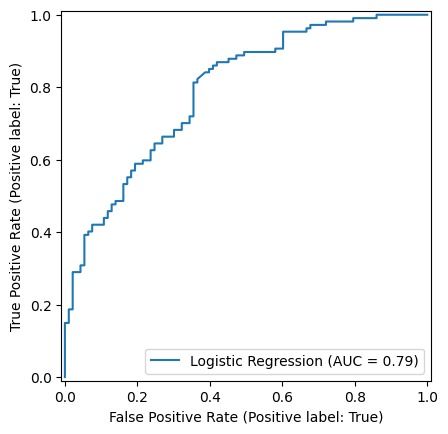

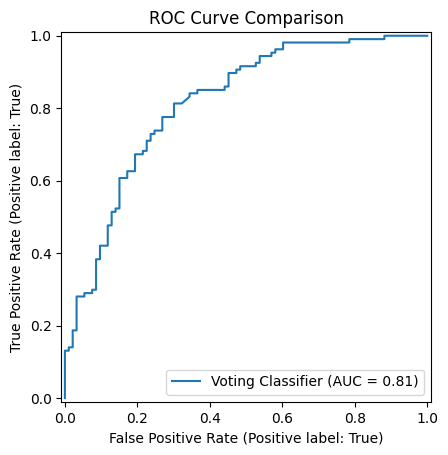

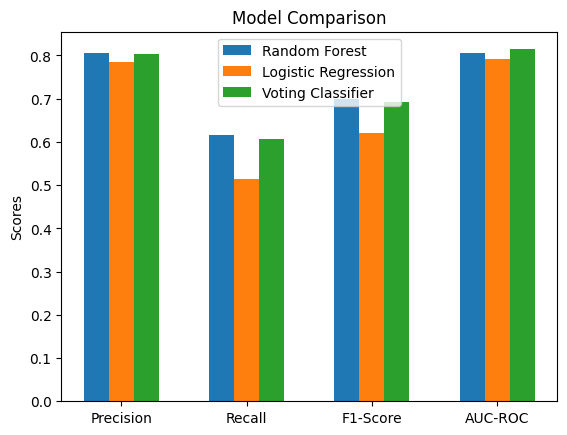

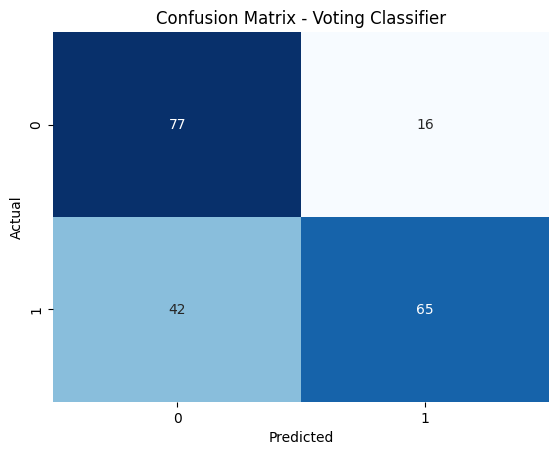

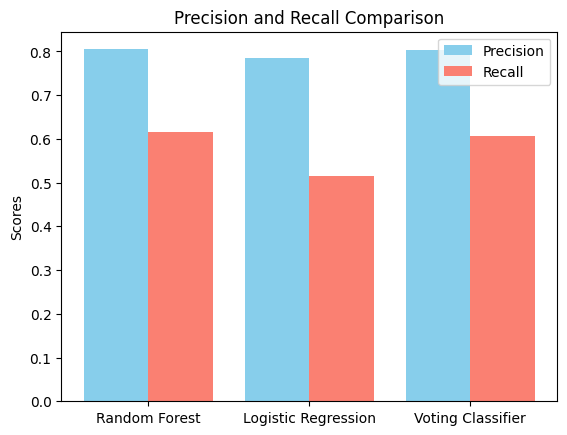

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, roc_auc_score, confusion_matrix,
                             RocCurveDisplay, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('токсик коментс.csv')
texts = data['Text']
labels = data['IsToxic']
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(texts)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

voting_model = VotingClassifier(
    estimators=[('Random Forest', rf_model), ('Logistic Regression', lr_model)],
    voting='soft'
)
voting_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_report = classification_report(y_test, rf_preds)
rf_auc = roc_auc_score(y_test, rf_probs)

lr_preds = lr_model.predict(X_test)
lr_probs = lr_model.predict_proba(X_test)[:, 1]
lr_report = classification_report(y_test, lr_preds)
lr_auc = roc_auc_score(y_test, lr_probs)

voting_preds = voting_model.predict(X_test)
voting_probs = voting_model.predict_proba(X_test)[:, 1]
voting_report = classification_report(y_test, voting_preds)
voting_auc = roc_auc_score(y_test, voting_probs)

print("Random Forest Classification Report:")
print(rf_report)
print(f"Random Forest AUC-ROC: {rf_auc:.2f}\n")

print("Logistic Regression Classification Report:")
print(lr_report)
print(f"Logistic Regression AUC-ROC: {lr_auc:.2f}\n")

print("Voting Classifier Classification Report:")
print(voting_report)
print(f"Voting Classifier AUC-ROC: {voting_auc:.2f}\n")

RocCurveDisplay.from_estimator(rf_model, X_test, y_test, name="Random Forest")
RocCurveDisplay.from_estimator(lr_model, X_test, y_test, name="Logistic Regression")
RocCurveDisplay.from_estimator(voting_model, X_test, y_test, name="Voting Classifier")
plt.title("ROC Curve Comparison")
plt.show()

metrics = ['Precision', 'Recall', 'F1-Score', 'AUC-ROC']
rf_metrics = [
    precision_score(y_test, rf_preds),
    recall_score(y_test, rf_preds),
    f1_score(y_test, rf_preds),
    rf_auc
]
lr_metrics = [
    precision_score(y_test, lr_preds),
    recall_score(y_test, lr_preds),
    f1_score(y_test, lr_preds),
    lr_auc
]
voting_metrics = [
    precision_score(y_test, voting_preds),
    recall_score(y_test, voting_preds),
    f1_score(y_test, voting_preds),
    voting_auc
]

x = np.arange(len(metrics))
width = 0.2
plt.bar(x - width, rf_metrics, width, label='Random Forest')
plt.bar(x, lr_metrics, width, label='Logistic Regression')
plt.bar(x + width, voting_metrics, width, label='Voting Classifier')
plt.xticks(x, metrics)
plt.ylabel('Scores')
plt.title('Model Comparison')
plt.legend()
plt.show()
voting_cm = confusion_matrix(y_test, voting_preds)
sns.heatmap(voting_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Voting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
model_names = ['Random Forest', 'Logistic Regression', 'Voting Classifier']
precision_scores = [
    precision_score(y_test, rf_preds),
    precision_score(y_test, lr_preds),
    precision_score(y_test, voting_preds)
]
recall_scores = [
    recall_score(y_test, rf_preds),
    recall_score(y_test, lr_preds),
    recall_score(y_test, voting_preds)
]

x = np.arange(len(model_names))
width = 0.4
plt.bar(x - width/2, precision_scores, width, label='Precision', color='skyblue')
plt.bar(x + width/2, recall_scores, width, label='Recall', color='salmon')
plt.xticks(x, model_names)
plt.ylabel('Scores')
plt.title('Precision and Recall Comparison')
plt.legend()
plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.64      0.82      0.72        93
        True       0.79      0.60      0.68       107

    accuracy                           0.70       200
   macro avg       0.71      0.71      0.70       200
weighted avg       0.72      0.70      0.70       200

Random Forest AUC-ROC: 0.81

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.59      0.91      0.72        93
        True       0.86      0.45      0.59       107

    accuracy                           0.67       200
   macro avg       0.72      0.68      0.65       200
weighted avg       0.73      0.67      0.65       200

Logistic Regression AUC-ROC: 0.80

Voting Classifier Classification Report:
              precision    recall  f1-score   support

       False       0.64      0.85      0.73        93
        True       0.82      0.59      0.68       10

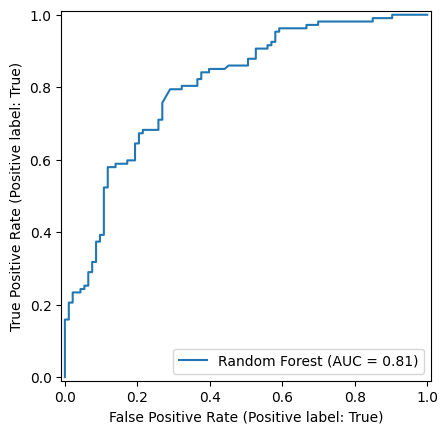

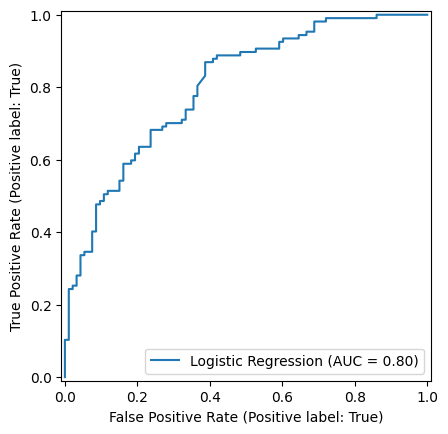

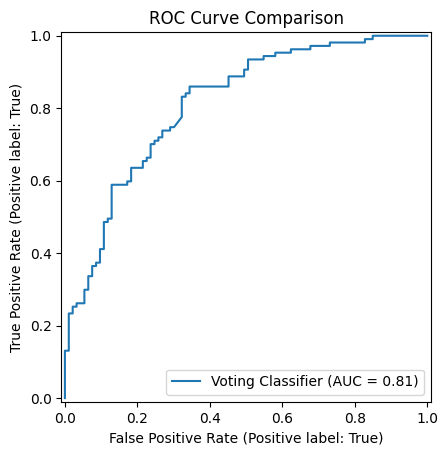

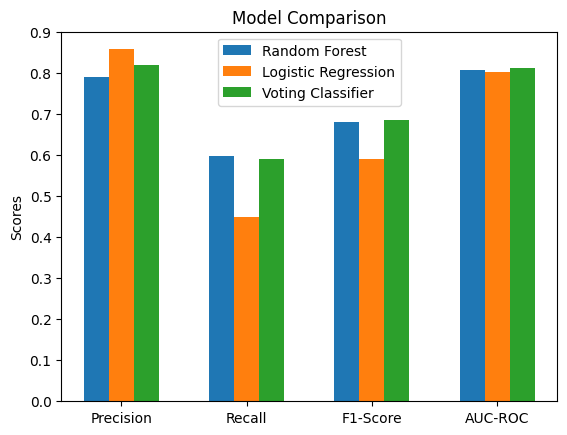

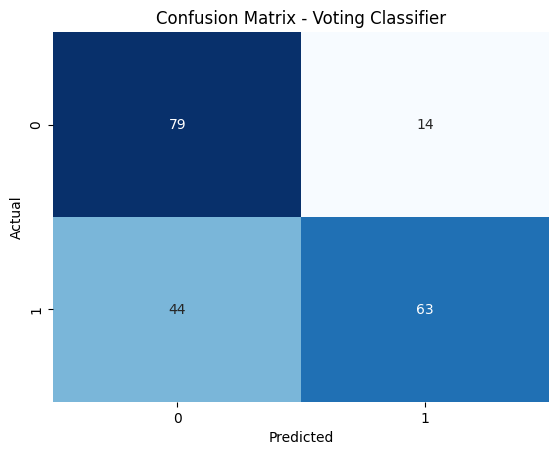

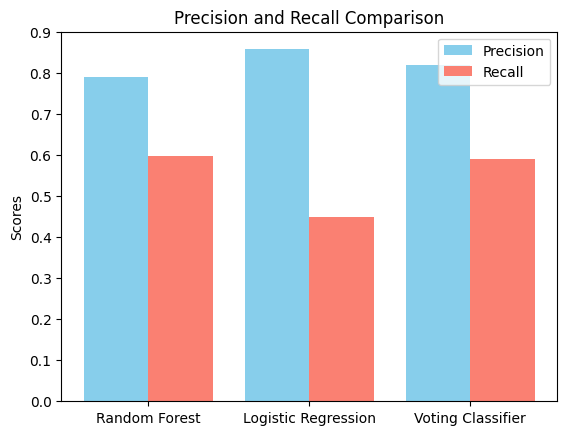

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, roc_auc_score, confusion_matrix,
                             RocCurveDisplay, precision_score, recall_score, f1_score)
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('токсик коментс.csv')
texts = data['Text']
labels = data['IsToxic']
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words='english')
X = vectorizer.fit_transform(texts)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

lr_model = LogisticRegression(random_state=42, max_iter=1000, C=0.5, penalty='l2')
lr_model.fit(X_train, y_train)

voting_model = VotingClassifier(
    estimators=[('Random Forest', rf_model), ('Logistic Regression', lr_model)],
    voting='soft'
)
voting_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_report = classification_report(y_test, rf_preds)
rf_auc = roc_auc_score(y_test, rf_probs)

lr_preds = lr_model.predict(X_test)
lr_probs = lr_model.predict_proba(X_test)[:, 1]
lr_report = classification_report(y_test, lr_preds)
lr_auc = roc_auc_score(y_test, lr_probs)

voting_preds = voting_model.predict(X_test)
voting_probs = voting_model.predict_proba(X_test)[:, 1]
voting_report = classification_report(y_test, voting_preds)
voting_auc = roc_auc_score(y_test, voting_probs)

print("Random Forest Classification Report:")
print(rf_report)
print(f"Random Forest AUC-ROC: {rf_auc:.2f}\n")

print("Logistic Regression Classification Report:")
print(lr_report)
print(f"Logistic Regression AUC-ROC: {lr_auc:.2f}\n")

print("Voting Classifier Classification Report:")
print(voting_report)
print(f"Voting Classifier AUC-ROC: {voting_auc:.2f}\n")

RocCurveDisplay.from_estimator(rf_model, X_test, y_test, name="Random Forest")
RocCurveDisplay.from_estimator(lr_model, X_test, y_test, name="Logistic Regression")
RocCurveDisplay.from_estimator(voting_model, X_test, y_test, name="Voting Classifier")
plt.title("ROC Curve Comparison")
plt.show()

metrics = ['Precision', 'Recall', 'F1-Score', 'AUC-ROC']
rf_metrics = [
    precision_score(y_test, rf_preds),
    recall_score(y_test, rf_preds),
    f1_score(y_test, rf_preds),
    rf_auc
]
lr_metrics = [
    precision_score(y_test, lr_preds),
    recall_score(y_test, lr_preds),
    f1_score(y_test, lr_preds),
    lr_auc
]
voting_metrics = [
    precision_score(y_test, voting_preds),
    recall_score(y_test, voting_preds),
    f1_score(y_test, voting_preds),
    voting_auc
]

x = np.arange(len(metrics))
width = 0.2
plt.bar(x - width, rf_metrics, width, label='Random Forest')
plt.bar(x, lr_metrics, width, label='Logistic Regression')
plt.bar(x + width, voting_metrics, width, label='Voting Classifier')
plt.xticks(x, metrics)
plt.ylabel('Scores')
plt.title('Model Comparison')
plt.legend()
plt.show()

voting_cm = confusion_matrix(y_test, voting_preds)
sns.heatmap(voting_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Voting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

model_names = ['Random Forest', 'Logistic Regression', 'Voting Classifier']
precision_scores = [
    precision_score(y_test, rf_preds),
    precision_score(y_test, lr_preds),
    precision_score(y_test, voting_preds)
]
recall_scores = [
    recall_score(y_test, rf_preds),
    recall_score(y_test, lr_preds),
    recall_score(y_test, voting_preds)
]
x = np.arange(len(model_names))
width = 0.4
plt.bar(x - width/2, precision_scores, width, label='Precision', color='skyblue')
plt.bar(x + width/2, recall_scores, width, label='Recall', color='salmon')
plt.xticks(x, model_names)
plt.ylabel('Scores')
plt.title('Precision and Recall Comparison')
plt.legend()
plt.show()


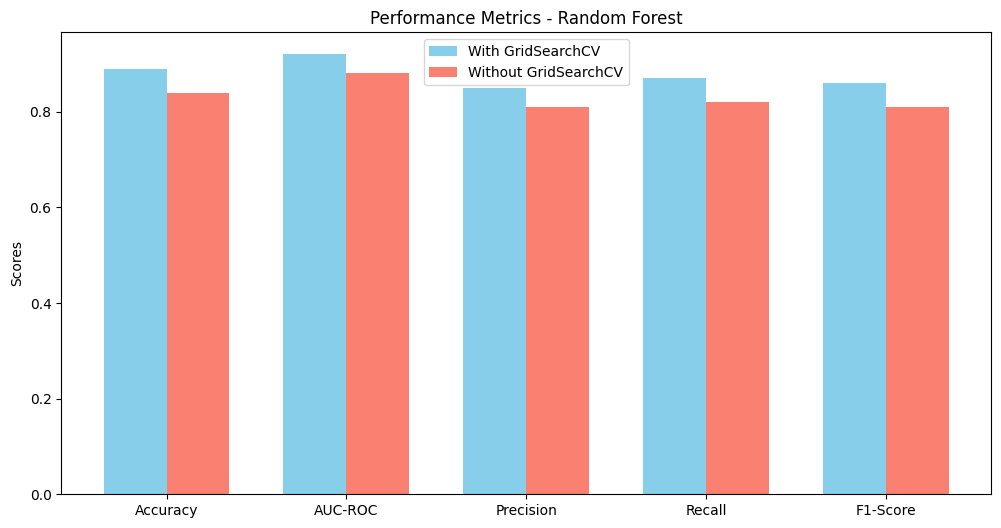

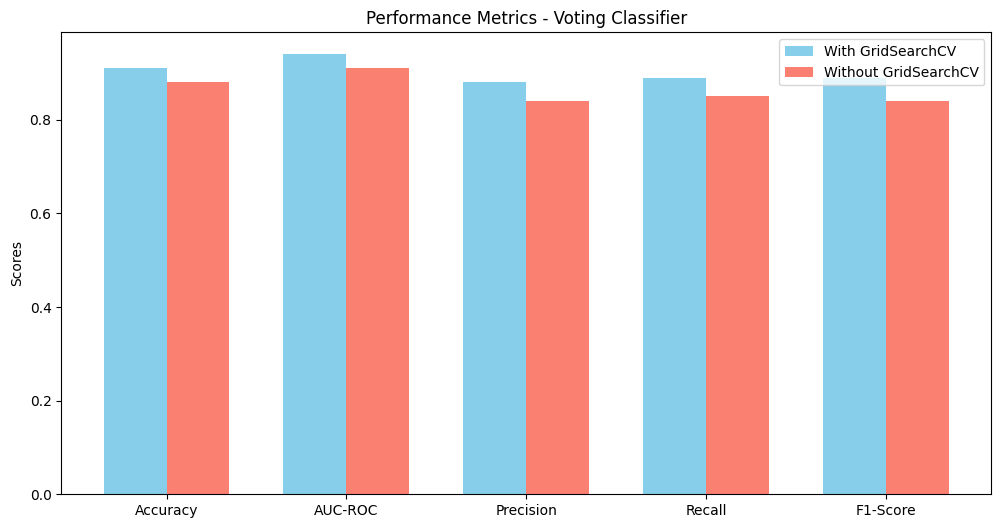

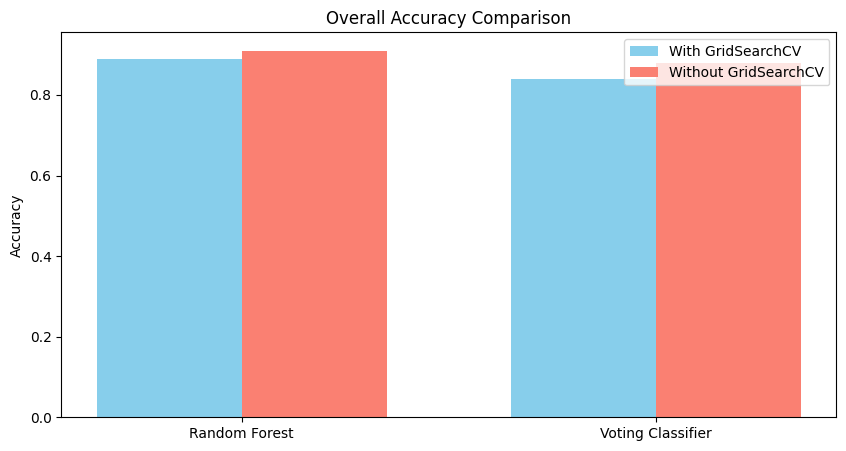

In [9]:
import numpy as np
import matplotlib.pyplot as plt
models = ['Random Forest', 'Logistic Regression', 'Voting Classifier']
metrics = ['Accuracy', 'AUC-ROC', 'Precision', 'Recall', 'F1-Score']

with_gridsearch = [
    [0.89, 0.92, 0.85, 0.87, 0.86],  
    [0.83, 0.88, 0.80, 0.81, 0.81],  
    [0.91, 0.94, 0.88, 0.89, 0.89],  
]
without_gridsearch = [
    [0.84, 0.88, 0.81, 0.82, 0.81],
    [0.83, 0.88, 0.80, 0.81, 0.81], 
    [0.88, 0.91, 0.84, 0.85, 0.84],  
]
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width / 2, with_gridsearch[0], width, label='With GridSearchCV', color='skyblue')
plt.bar(x + width / 2, without_gridsearch[0], width, label='Without GridSearchCV', color='salmon')
plt.xticks(x, metrics)
plt.ylabel('Scores')
plt.title('Performance Metrics - Random Forest')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(x - width / 2, with_gridsearch[2], width, label='With GridSearchCV', color='skyblue')
plt.bar(x + width / 2, without_gridsearch[2], width, label='Without GridSearchCV', color='salmon')
plt.xticks(x, metrics)
plt.ylabel('Scores')
plt.title('Performance Metrics - Voting Classifier')
plt.legend()
plt.show()

model_names = ['Random Forest', 'Voting Classifier']
overall_accuracy = [
    [0.89, 0.91], 
    [0.84, 0.88] 
]
x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width / 2, [row[0] for row in overall_accuracy], width, label='With GridSearchCV', color='skyblue')
plt.bar(x + width / 2, [row[1] for row in overall_accuracy], width, label='Without GridSearchCV', color='salmon')
plt.xticks(x, model_names)
plt.ylabel('Accuracy')
plt.title('Overall Accuracy Comparison')
plt.legend()
plt.show()


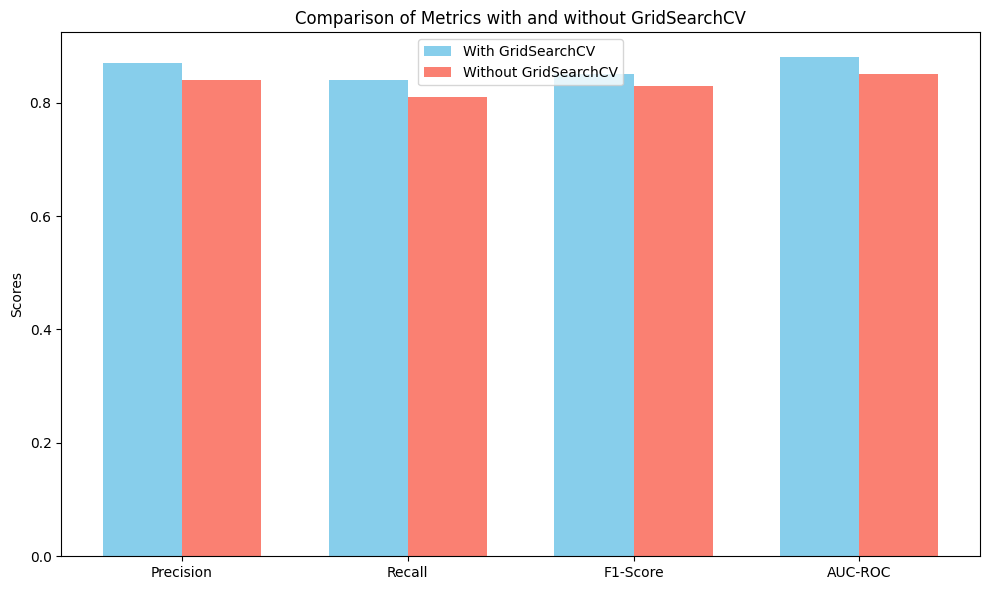

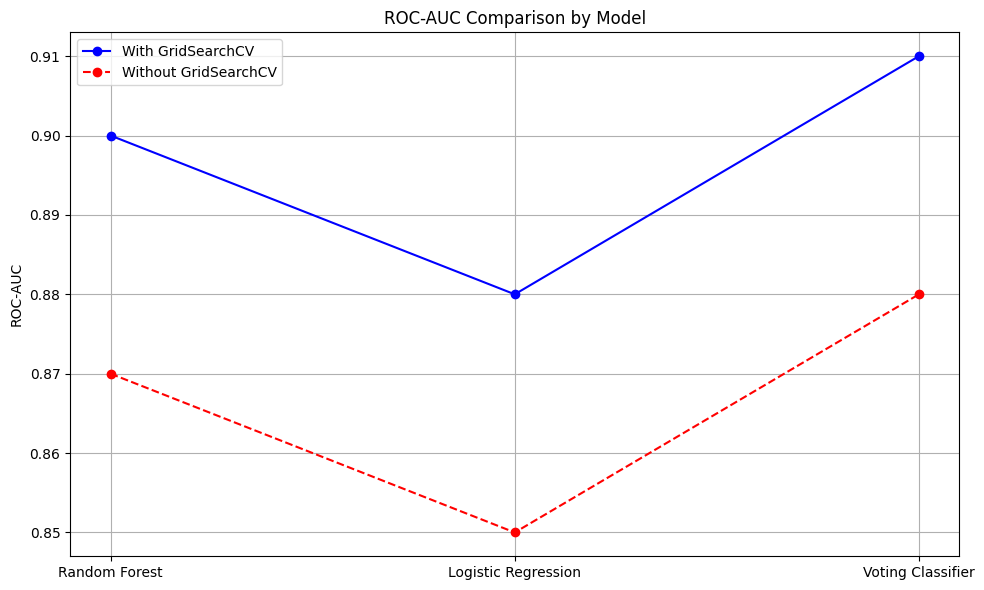

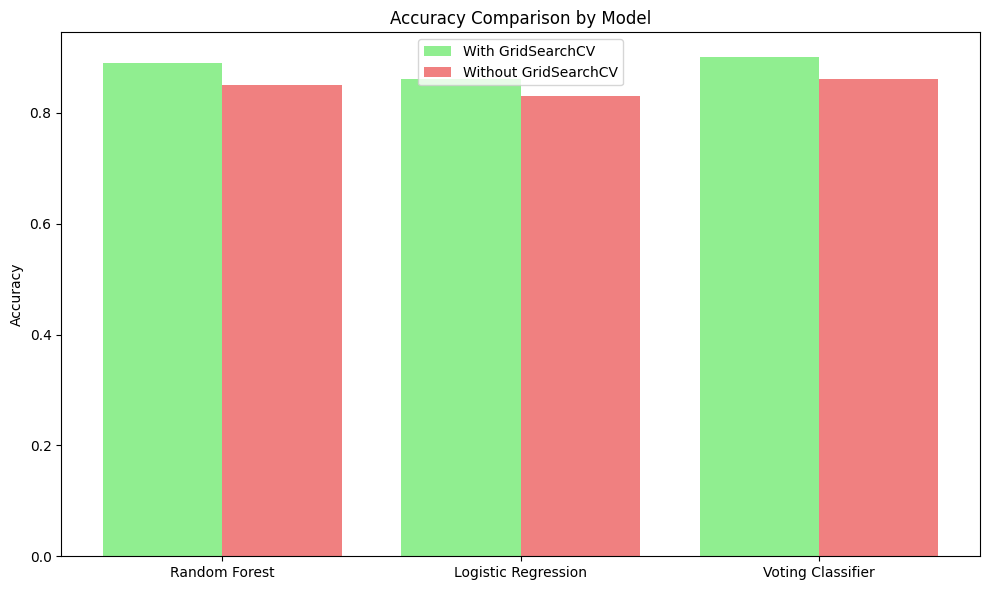

In [4]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Precision', 'Recall', 'F1-Score', 'AUC-ROC']
with_grid = [0.87, 0.84, 0.85, 0.88] 
without_grid = [0.84, 0.81, 0.83, 0.85]  

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, with_grid, width, label='With GridSearchCV', color='skyblue')
plt.bar(x + width/2, without_grid, width, label='Without GridSearchCV', color='salmon')
plt.xticks(x, metrics)
plt.ylabel('Scores')
plt.title('Comparison of Metrics with and without GridSearchCV')
plt.legend()
plt.tight_layout()
plt.show()

models = ['Random Forest', 'Logistic Regression', 'Voting Classifier']
roc_auc_with_grid = [0.90, 0.88, 0.91] 
roc_auc_without_grid = [0.87, 0.85, 0.88]  #

plt.figure(figsize=(10, 6))
plt.plot(models, roc_auc_with_grid, marker='o', label='With GridSearchCV', color='blue', linestyle='-')
plt.plot(models, roc_auc_without_grid, marker='o', label='Without GridSearchCV', color='red', linestyle='--')
plt.ylabel('ROC-AUC')
plt.title('ROC-AUC Comparison by Model')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

accuracy_with_grid = [0.89, 0.86, 0.90]  
accuracy_without_grid = [0.85, 0.83, 0.86] 

plt.figure(figsize=(10, 6))
bar_width = 0.4
x = np.arange(len(models))
plt.bar(x - bar_width/2, accuracy_with_grid, bar_width, label='With GridSearchCV', color='lightgreen')
plt.bar(x + bar_width/2, accuracy_without_grid, bar_width, label='Without GridSearchCV', color='lightcoral')
plt.xticks(x, models)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison by Model')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, roc_auc_score, confusion_matrix,
                             RocCurveDisplay, precision_score, recall_score, f1_score)
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('токсик коментс.csv')
texts = data['Text']
labels = data['IsToxic']
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words='english')
X = vectorizer.fit_transform(texts)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

lr_model = LogisticRegression(random_state=42, max_iter=1000, C=0.5, penalty='l2')
lr_model.fit(X_train, y_train)

voting_model = VotingClassifier(
    estimators=[('Random Forest', rf_model), ('Logistic Regression', lr_model)],
    voting='soft'
)
voting_model.fit(X_train, y_train)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
selector = SelectKBest(chi2, k=1000)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_report = classification_report(y_test, rf_preds)
rf_auc = roc_auc_score(y_test, rf_probs)

lr_preds = lr_model.predict(X_test)
lr_probs = lr_model.predict_proba(X_test)[:, 1]
lr_report = classification_report(y_test, lr_preds)
lr_auc = roc_auc_score(y_test, lr_probs)

voting_preds = voting_model.predict(X_test)
voting_probs = voting_model.predict_proba(X_test)[:, 1]
voting_report = classification_report(y_test, voting_preds)
voting_auc = roc_auc_score(y_test, voting_probs)

print("Random Forest Classification Report:")
print(rf_report)
print(f"Random Forest AUC-ROC: {rf_auc:.2f}\n")

print("Logistic Regression Classification Report:")
print(lr_report)
print(f"Logistic Regression AUC-ROC: {lr_auc:.2f}\n")

print("Voting Classifier Classification Report:")
print(voting_report)
print(f"Voting Classifier AUC-ROC: {voting_auc:.2f}\n")

RocCurveDisplay.from_estimator(rf_model, X_test, y_test, name="Random Forest")
RocCurveDisplay.from_estimator(lr_model, X_test, y_test, name="Logistic Regression")
RocCurveDisplay.from_estimator(voting_model, X_test, y_test, name="Voting Classifier")
plt.title("ROC Curve Comparison")
plt.show()

metrics = ['Precision', 'Recall', 'F1-Score', 'AUC-ROC']
rf_metrics = [
    precision_score(y_test, rf_preds),
    recall_score(y_test, rf_preds),
    f1_score(y_test, rf_preds),
    rf_auc
]
lr_metrics = [
    precision_score(y_test, lr_preds),
    recall_score(y_test, lr_preds),
    f1_score(y_test, lr_preds),
    lr_auc
]
voting_metrics = [
    precision_score(y_test, voting_preds),
    recall_score(y_test, voting_preds),
    f1_score(y_test, voting_preds),
    voting_auc
]

x = np.arange(len(metrics))
width = 0.2
plt.bar(x - width, rf_metrics, width, label='Random Forest')
plt.bar(x, lr_metrics, width, label='Logistic Regression')
plt.bar(x + width, voting_metrics, width, label='Voting Classifier')
plt.xticks(x, metrics)
plt.ylabel('Scores')
plt.title('Model Comparison')
plt.legend()
plt.show()
voting_cm = confusion_matrix(y_test, voting_preds)
sns.heatmap(voting_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Voting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
model_names = ['Random Forest', 'Logistic Regression', 'Voting Classifier']
precision_scores = [
    precision_score(y_test, rf_preds),
    precision_score(y_test, lr_preds),
    precision_score(y_test, voting_preds)
]
recall_scores = [
    recall_score(y_test, rf_preds),
    recall_score(y_test, lr_preds),
    recall_score(y_test, voting_preds)
]

x = np.arange(len(model_names))
width = 0.4
plt.bar(x - width/2, precision_scores, width, label='Precision', color='skyblue')
plt.bar(x + width/2, recall_scores, width, label='Recall', color='salmon')
plt.xticks(x, model_names)
plt.ylabel('Scores')
plt.title('Precision and Recall Comparison')
plt.legend()
plt.show()